In [30]:
#Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np

import sklearn as sks
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVR   
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [31]:
#Input file path for test and train data
train_data_file = "Resources/19332020Main.csv"
test_data_file = "Resources/2021Players.csv"

#Load the test and train data into dataframes
train_df = pd.read_csv(train_data_file, encoding='ISO-8859-1')
test_df = pd.read_csv(test_data_file, encoding='ISO-8859-1')


In [32]:
test_df.head()

,Rk,Player,AB,Year,Age,Tm,Lg,G,PA,R,...,SF,GDP,SB,CS,BA,OBP,SLG,OPS,Pos,All Star
0,1,Whit Merrifield,664,2021,32,KCR,AL,162,720,97,...,12,12,40,4,0.277,0.317,0.395,0.711,*49/7D,1
1,2,Marcus Semien,652,2021,30,TOR,AL,162,724,115,...,3,9,15,1,0.265,0.334,0.538,0.873,*46/D,1
2,3,Bo Bichette,640,2021,23,TOR,AL,159,690,121,...,4,10,25,1,0.298,0.344,0.484,0.828,*6D,1
3,4,Ozzie Albies,629,2021,24,ATL,NL,156,686,103,...,7,4,20,4,0.259,0.311,0.488,0.799,*4,1
4,5,Jonathan Schoop,623,2021,29,DET,AL,156,674,85,...,8,15,2,0,0.278,0.321,0.435,0.756,*34D/5,1


In [33]:
train_df.head()

,Rk,Player,AB,Year,Age,Tm,Lg,G,PA,R,...,SF,GDP,SB,CS,BA,OBP,SLG,OPS,Pos,All Star
0,1,Juan Soto,154,2020,21,WSN,NL,47,196,39,...,0.0,1.0,6,2,0.351,0.490,0.695,1.185,*7/9D,1
1,2,Nelson Cruz,185,2020,39,MIN,AL,53,214,33,...,0.0,8.0,0,0,0.303,0.397,0.595,0.992,*D/H,1
2,3,DJ LeMahieu,195,2020,31,NYY,AL,50,216,41,...,1.0,3.0,3,0,0.364,0.421,0.590,1.011,*435/HD,1
3,4,Mike Trout,199,2020,28,LAA,AL,53,241,41,...,4.0,1.0,1,1,0.281,0.390,0.603,0.993,*8/D,1
4,5,Freddie Freeman,214,2020,30,ATL,NL,60,262,51,...,0.0,6.0,2,0,0.341,0.462,0.640,1.102,*3/HD,1


In [34]:
#Check to see if there are any empty or null values in the test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rk        533 non-null    int64  
 1   Player    533 non-null    object 
 2   AB        533 non-null    int64  
 3   Year      533 non-null    int64  
 4   Age       533 non-null    int64  
 5   Tm        533 non-null    object 
 6   Lg        533 non-null    object 
 7   G         533 non-null    int64  
 8   PA        533 non-null    int64  
 9   R         533 non-null    int64  
 10  H         533 non-null    int64  
 11  2B        533 non-null    int64  
 12  3B        533 non-null    int64  
 13  HR        533 non-null    int64  
 14  RBI       533 non-null    int64  
 15  BB        533 non-null    int64  
 16  IBB       533 non-null    int64  
 17  SO        533 non-null    int64  
 18  HBP       533 non-null    int64  
 19  SH        533 non-null    int64  
 20  SF        533 non-null    int64 

In [35]:
#Check to see if there are any empty or null values in the train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rk        3254 non-null   int64  
 1   Player    3254 non-null   object 
 2   AB        3254 non-null   int64  
 3   Year      3254 non-null   int64  
 4   Age       3254 non-null   int64  
 5   Tm        3254 non-null   object 
 6   Lg        3254 non-null   object 
 7   G         3254 non-null   int64  
 8   PA        3254 non-null   int64  
 9   R         3254 non-null   int64  
 10  H         3254 non-null   int64  
 11  2B        3254 non-null   int64  
 12  3B        3254 non-null   int64  
 13  HR        3254 non-null   int64  
 14  RBI       3254 non-null   int64  
 15  BB        3254 non-null   int64  
 16  IBB       3254 non-null   int64  
 17  SO        3254 non-null   int64  
 18  HBP       3254 non-null   int64  
 19  SH        3254 non-null   int64  
 20  SF        2589 non-null   floa

In [36]:
#Fill all the emapty values with 0
train_df = train_df.fillna(value=0)

In [37]:
#Check to see if the empty or null values are filled with 0s
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rk        3254 non-null   int64  
 1   Player    3254 non-null   object 
 2   AB        3254 non-null   int64  
 3   Year      3254 non-null   int64  
 4   Age       3254 non-null   int64  
 5   Tm        3254 non-null   object 
 6   Lg        3254 non-null   object 
 7   G         3254 non-null   int64  
 8   PA        3254 non-null   int64  
 9   R         3254 non-null   int64  
 10  H         3254 non-null   int64  
 11  2B        3254 non-null   int64  
 12  3B        3254 non-null   int64  
 13  HR        3254 non-null   int64  
 14  RBI       3254 non-null   int64  
 15  BB        3254 non-null   int64  
 16  IBB       3254 non-null   int64  
 17  SO        3254 non-null   int64  
 18  HBP       3254 non-null   int64  
 19  SH        3254 non-null   int64  
 20  SF        3254 non-null   floa

In [38]:
#Check to see if there any NaN values
train_df.isna()

,Rk,Player,AB,Year,Age,Tm,Lg,G,PA,R,...,SF,GDP,SB,CS,BA,OBP,SLG,OPS,Pos,All Star
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3250,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3251,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3252,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
#drop the insignificant columns from the test dataset
test_df.drop(columns=["Player", "Tm", "Pos", "Lg", "Year", "Rk"], axis = 1, inplace=True)
test_df.head()

,AB,Age,G,PA,R,H,2B,3B,HR,RBI,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS,All Star
0,664,32,162,720,97,184,42,3,10,74,...,0,12,12,40,4,0.277,0.317,0.395,0.711,1
1,652,30,162,724,115,173,39,2,45,102,...,0,3,9,15,1,0.265,0.334,0.538,0.873,1
2,640,23,159,690,121,191,30,1,29,102,...,0,4,10,25,1,0.298,0.344,0.484,0.828,1
3,629,24,156,686,103,163,40,7,30,106,...,0,7,4,20,4,0.259,0.311,0.488,0.799,1
4,623,29,156,674,85,173,30,1,22,84,...,0,8,15,2,0,0.278,0.321,0.435,0.756,1


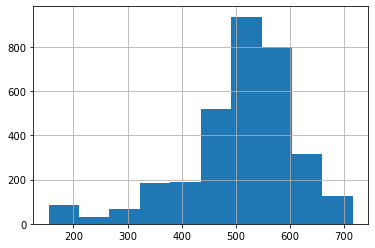

In [41]:
#drop the insignificant columns from the test dataset
train_df.drop(columns=["Player", "Tm", "Pos", "Lg", "Year", "Rk"], axis = 1, inplace=True)

#train_df.head()
train_df["AB"].hist()

In [12]:
#Rename the All Star column to Classification in both test and train dataset
train_df.rename(columns={"All Star":"Classification"}, inplace=True)
test_df.rename(columns={"All Star":"Classification"}, inplace=True)
print(train_df.columns)
print(test_df.columns)

Index(['Age', 'G', 'PA', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'IBB', 'SO',
       'HBP', 'SH', 'SF', 'GDP', 'SB', 'CS', 'BA', 'OBP', 'SLG', 'OPS',
       'Classification'],
      dtype='object')
Index(['Age', 'G', 'PA', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'IBB', 'SO',
       'HBP', 'SH', 'SF', 'GDP', 'SB', 'CS', 'BA', 'OBP', 'SLG', 'OPS',
       'Classification'],
      dtype='object')


In [13]:
#Function to execute the model that is passed in as a parameter along with the test and train data
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    #print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    #print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')

    print(f'Train score: {roc_auc_score(y_train, reg.predict_proba(X_train_scaled)[:,1])}')
    print(f'Test Score: {roc_auc_score(y_test, reg.predict_proba(X_test_scaled)[:,1])}\n')                   
    print(f'Classification Score: {classification_report(y_test, reg.predict(X_test_scaled))}\n')
    return reg

In [14]:
#Create the classifier and drop the column from the train dataset
X_train = train_df.drop(columns = ['Classification'])
y_train = train_df['Classification']

#Create the classifier and drop the column from the test dataset
X_test = test_df.drop(columns = ['Classification'])
y_test = test_df['Classification']

#Print the columns to check if the columns are dropped as expected
print(X_train.columns)
print(X_test.columns)

Index(['Age', 'G', 'PA', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'IBB', 'SO',
       'HBP', 'SH', 'SF', 'GDP', 'SB', 'CS', 'BA', 'OBP', 'SLG', 'OPS'],
      dtype='object')
Index(['Age', 'G', 'PA', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'IBB', 'SO',
       'HBP', 'SH', 'SF', 'GDP', 'SB', 'CS', 'BA', 'OBP', 'SLG', 'OPS'],
      dtype='object')


In [15]:
#Check to see the distribution of the classification values
y_train.value_counts()

0    1800
1    1454
Name: Classification, dtype: int64

In [16]:
#Scale the train and test data
train_scaler = StandardScaler()
train_scaler = train_scaler.fit(X_train)

X_train_scaled = pd.DataFrame(train_scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(train_scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

scaled_data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [17]:

#Execute the models with the scaled data
rfc = test_model(RandomForestClassifier(), scaled_data)
lr = test_model(LogisticRegression(), scaled_data)
abc = test_model(AdaBoostClassifier(), scaled_data)

Model: RandomForestClassifier
Train score: 1.0
Test Score: 0.5225239338555265

Classification Score:               precision    recall  f1-score   support

           0       0.70      0.40      0.51       383
           1       0.27      0.57      0.37       150

    accuracy                           0.45       533
   macro avg       0.49      0.48      0.44       533
weighted avg       0.58      0.45      0.47       533


Model: LogisticRegression
Train score: 0.8038415100106984
Test Score: 0.6290513489991296

Classification Score:               precision    recall  f1-score   support

           0       0.78      0.74      0.76       383
           1       0.40      0.45      0.43       150

    accuracy                           0.66       533
   macro avg       0.59      0.60      0.59       533
weighted avg       0.67      0.66      0.66       533


Model: AdaBoostClassifier
Train score: 0.8855662540119211
Test Score: 0.499242819843342

Classification Score:               precis

In [18]:
#Check the keys available in metrics to be used in RandomizedSearchCV and GridSearchCV
sks.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [19]:
#Define the parameters for the RandomizedSearchCV
params_grid = {'criterion' : ['gini','entropy'],
               'max_depth': [3,6,8,15],
               'max_leaf_nodes':[2,10,20,40,100],
               'max_features':['auto','log2'],
               'max_samples':[0.1,0.4,0.8,1],
               'min_samples_leaf': [5,50,100,200,400,1000],
               'min_samples_split': [5,10,100,1000,2000,3000],
               'n_estimators': [10,50,100,500]}

#Initialize the RandomizedSearchCV model with the params and scoring key as 'roc_auc'
rf_grid_new = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,random_state=42),
                                 params_grid, n_iter= 400,  cv = 3, verbose=2, n_jobs = -1,
                                 scoring='roc_auc', return_train_score=True)

#Fit the model
search = rf_grid_new.fit(X_train_scaled, y_train)

#Print the best params 
search.best_params_

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.5min finished


{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_samples': 0.4,
 'max_leaf_nodes': 40,
 'max_features': 'auto',
 'max_depth': 6,
 'criterion': 'entropy'}

In [20]:
#Determine the best_estimator using in the predict_proba 
probability_scores = rf_grid_new.best_estimator_.predict_proba(X_test_scaled)[:,1]

In [21]:
#Determine and print the roc_auc_score for RandomizedSearchCV
roc_auc_score(y_test, probability_scores)

0.5377371627502175

In [22]:

#Initialize the logistic regression model
lr = LogisticRegression(n_jobs=-1, random_state=42)

#Define the parameters
grid_values = {'penalty': ['l1','none', 'l2'], 'C': [0.001,0.01,0.1,1,10,100], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

#Initialize the GridSearchCV model with the params and scoring key as 'roc_auc'
model_lr = GridSearchCV(lr, param_grid=grid_values, 
                        cv = 2, verbose=3, n_jobs = -1, 
                        scoring='roc_auc',
                        return_train_score=True)
#Fit the model
search = model_lr.fit(X_train_scaled, y_train)
#Print the best_params
search.best_params_

Fitting 2 folds for each of 90 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 157 out of 180 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.1s finished
/Users/b77077/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [23]:
#Determine the best_estimator using in the predict_proba 
probability_scores_lr = model_lr.best_estimator_.predict_proba(X_test_scaled)[:,1]
#Determine and print the roc_auc_score for GridSearchCV
roc_auc_score(y_test, probability_scores_lr)

0.6262315056570931

In [24]:
#scaled_df = pd.DataFrame(X_test_scaled)


#probability_scores_ind = model_lr.best_estimator_.predict_proba(scaled_df.iloc[:1,:])[:,1]
#probability_scores_ind

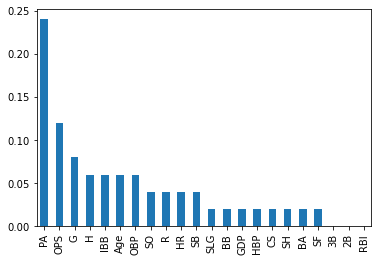

In [27]:
# Detemrine the feature importances
pd.Series(abc.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)[:100].plot(kind='bar')

In [28]:
X_train_scaled[y_train == 1].describe()

,Age,G,PA,R,H,2B,3B,HR,RBI,BB,...,HBP,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS
count,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,...,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000
mean,0.133098,0.000985,0.136672,0.322385,0.244360,0.178887,0.045277,0.306233,0.289797,0.197294,...,0.019561,-0.199924,0.104147,0.055691,0.091082,-0.031227,0.335385,0.321397,0.376304,0.384541
std,1.116575,1.180522,1.186055,1.168508,1.190523,1.110077,1.104676,1.159175,1.155003,1.181412,...,0.993677,0.915564,1.056071,1.043989,1.108462,0.992674,1.092480,1.141557,1.139223,1.157626
min,-2.298437,-3.984910,-3.394201,-2.421837,-3.061101,-2.526849,-1.238185,-1.357038,-2.184707,-1.855792,...,-1.067549,-0.843765,-1.205964,-1.920285,-0.812179,-1.145282,-3.361252,-2.201017,-1.938616,-1.938821
25%,-0.589251,-0.332740,-0.309605,-0.547632,-0.480548,-0.567562,-0.649400,-0.676925,-0.649988,-0.659787,...,-0.778474,-0.843765,-0.858228,-0.662767,-0.656910,-0.676037,-0.381979,-0.506175,-0.468514,-0.455303
50%,-0.019522,0.470524,0.575464,0.410295,0.459110,0.194383,-0.355008,0.088201,0.190453,-0.061785,...,-0.200326,-0.614486,0.184982,-0.123831,-0.346373,-0.206791,0.320996,0.107899,0.207259,0.170691
75%,0.835071,0.813249,1.031143,1.201626,1.146322,0.847479,0.528169,1.108370,1.167923,0.815285,...,0.377822,0.073349,0.880456,0.774397,0.410563,0.497077,1.023970,1.016727,1.164604,1.146125
max,3.968579,1.155975,1.784766,3.825514,3.306133,4.004108,4.944056,4.848990,4.173415,7.114241,...,6.159303,4.658922,4.705559,4.546952,7.494703,6.128024,4.170619,6.322322,4.973237,5.375868


In [29]:
X_train_scaled[y_train == 0].describe()

,Age,G,PA,R,H,2B,3B,HR,RBI,BB,...,HBP,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,...,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,-0.107513,-0.000796,-0.110401,-0.260416,-0.197388,-0.144501,-0.036573,-0.247368,-0.234092,-0.159370,...,-0.015801,0.161494,-0.084127,-0.044986,-0.073574,0.025225,-0.270916,-0.259617,-0.303970,-0.310624
std,0.880877,0.826550,0.803317,0.744396,0.759466,0.875647,0.905638,0.765838,0.780139,0.790327,...,1.005353,1.036025,0.944537,0.961228,0.896820,1.005723,0.824906,0.778036,0.744087,0.714401
min,-2.298437,-3.899228,-3.376675,-2.338539,-3.005002,-2.526849,-1.238185,-1.357038,-2.002003,-1.776058,...,-1.067549,-0.843765,-1.205964,-1.920285,-0.812179,-1.145282,-2.557853,-2.422084,-1.986039,-2.015998
25%,-0.589251,-0.257768,-0.467340,-0.755877,-0.620795,-0.785260,-0.649400,-0.846953,-0.832693,-0.739521,...,-0.778474,-0.614486,-0.858228,-0.662767,-0.656910,-0.676037,-0.884104,-0.850056,-0.871606,-0.918366
50%,-0.304386,0.170639,-0.020424,-0.297738,-0.200053,-0.132165,-0.355008,-0.336869,-0.284579,-0.261119,...,-0.200326,-0.155929,-0.162754,-0.123831,-0.346373,-0.206791,-0.281554,-0.260545,-0.302534,-0.240921
75%,0.550207,0.556205,0.419920,0.243699,0.283801,0.412082,0.528169,0.258230,0.263535,0.336883,...,0.377822,0.761185,0.532719,0.594751,0.119434,0.497077,0.287521,0.279839,0.219115,0.179266
max,3.398850,1.113134,1.539401,2.242851,2.156104,2.915615,4.355271,2.723638,3.369514,3.127560,...,7.604673,5.576036,3.662349,3.289433,6.640724,6.597269,2.463395,2.318563,2.554681,2.588911


In [ ]:
#Save the model, based on the test and train it was determined that the AdaBoostClassifier model had the best score

import pickle as pkl

with open('abc.pkl', 'wb') as model:
    pkl.dump(abc, model)
with open('scaler.pkl', 'wb') as scaler:
    pkl.dump(train_scaler, scaler)